In [1]:
#Objetivos: otimizar o uso da energia solar
# prever, com precisão, a quantidade de energia elétrica, em kWh, gerada por painéis solares
# Problema de classificação?
#

In [2]:
import pandas as pd
import numpy 
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
!pip install chardet
import chardet

# Function to detect encoding and read
def encode_and_read(file_path):
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read())
    return pd.read_csv(file_path, encoding=result['encoding'])

# Read the CSV file with the detected encoding
energia2021 = encode_and_read('energia_202109-202112.csv')
energia2022 = encode_and_read('energia_202201-202212.csv')

#dataset de teste
energia2023 = encode_and_read('energia_202301-202304.csv')

meteo2021 = encode_and_read('meteo_202109-202112.csv')
meteo2022 = encode_and_read('meteo_202201-202212.csv')

#dataset de teste
meteo2023 = encode_and_read('meteo_202301-202304.csv')

In [4]:
energia_data = pd.concat([energia2021, energia2022], ignore_index=True)
meteo_data = pd.concat([meteo2021, meteo2022], ignore_index=True)

In [5]:
meteo_data['dt_iso'] = pd.to_datetime(meteo_data['dt_iso'], format='%Y-%m-%d %H:%M:%S %z UTC', errors='coerce')
meteo2023['dt_iso'] = pd.to_datetime(meteo2023['dt_iso'], format='%Y-%m-%d %H:%M:%S %z UTC', errors='coerce')

meteo_data['Data'] = meteo_data['dt_iso'].dt.date.astype('string')
meteo2023['Data'] = meteo2023['dt_iso'].dt.date.astype('string')

meteo_data['Hora'] = meteo_data['dt_iso'].dt.hour.astype('int64')
meteo2023['Hora'] = meteo2023['dt_iso'].dt.hour.astype('int64')

meteo_data['Data'] = meteo_data['Data'].str.strip()
meteo2023['Data'] = meteo2023['Data'].str.strip()
energia_data['Data'] = energia_data['Data'].str.strip()
energia2023['Data'] = energia2023['Data'].str.strip()

energia_meteo = pd.merge(meteo_data, energia_data, left_on=['Data', 'Hora'], right_on=['Data', 'Hora'], how='inner')
test_data = pd.merge(meteo2023, energia2023, left_on=['Data', 'Hora'], right_on=['Data', 'Hora'], how='right')

In [6]:
energia_meteo

,dt,dt_iso,city_name,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,...,wind_speed,rain_1h,clouds_all,weather_description,Data,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh)
0,1632873600,2021-09-29 00:00:00+00:00,local,13.97,13.54,11.45,14.04,1027,NaN,NaN,...,1.96,NaN,87,overcast clouds,2021-09-29,0,0.000,0.000,0.0,NaN
1,1632877200,2021-09-29 01:00:00+00:00,local,13.48,13.02,13.43,13.90,1028,NaN,NaN,...,1.83,NaN,91,overcast clouds,2021-09-29,1,0.000,0.000,0.0,NaN
2,1632880800,2021-09-29 02:00:00+00:00,local,12.93,12.47,12.72,13.43,1027,NaN,NaN,...,1.96,NaN,93,overcast clouds,2021-09-29,2,0.000,0.000,0.0,NaN
3,1632884400,2021-09-29 03:00:00+00:00,local,12.61,12.15,10.34,12.93,1027,NaN,NaN,...,1.85,NaN,95,overcast clouds,2021-09-29,3,0.000,0.000,0.0,NaN
4,1632888000,2021-09-29 04:00:00+00:00,local,12.61,12.17,9.79,12.93,1027,NaN,NaN,...,1.83,NaN,93,overcast clouds,2021-09-29,4,0.000,0.000,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11011,1672513200,2022-12-31 19:00:00+00:00,local,15.70,15.57,15.57,15.72,1018,NaN,NaN,...,5.56,3.58,100,moderate rain,2022-12-31,19,1.693,0.000,0.0,NaN
11012,1672516800,2022-12-31 20:00:00+00:00,local,15.55,15.43,12.72,15.70,1018,NaN,NaN,...,4.47,4.20,100,heavy intensity rain,2022-12-31,20,1.327,0.000,0.0,NaN
11013,1672520400,2022-12-31 21:00:00+00:00,local,13.45,13.28,12.23,13.99,1019,NaN,NaN,...,3.29,4.23,100,heavy intensity rain,2022-12-31,21,0.757,0.000,0.0,NaN
11014,1672524000,2022-12-31 22:00:00+00:00,local,12.93,12.73,12.23,13.43,1019,NaN,NaN,...,1.49,3.90,100,moderate rain,2022-12-31,22,0.000,0.675,0.0,NaN


In [7]:
test_data

,dt,dt_iso,city_name,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description,Data,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh)
0,1.672531e+09,2023-01-01 00:00:00+00:00,local,12.93,12.76,12.72,13.43,1019.0,NaN,NaN,95.0,2.02,3.72,100.0,moderate rain,2023-01-01,0,0.000,0.467,0.000
1,1.672535e+09,2023-01-01 01:00:00+00:00,local,13.49,13.38,13.43,13.90,1018.0,NaN,NaN,95.0,2.18,3.26,100.0,moderate rain,2023-01-01,1,0.000,0.577,0.000
2,1.672538e+09,2023-01-01 02:00:00+00:00,local,13.55,13.44,13.48,14.82,1017.0,NaN,NaN,95.0,2.88,2.44,100.0,moderate rain,2023-01-01,2,0.000,0.346,0.000
3,1.672542e+09,2023-01-01 03:00:00+00:00,local,13.61,13.51,12.01,14.82,1016.0,NaN,NaN,95.0,3.63,1.74,100.0,moderate rain,2023-01-01,3,0.000,0.270,0.000
4,1.672546e+09,2023-01-01 04:00:00+00:00,local,13.59,13.49,12.01,14.82,1015.0,NaN,NaN,95.0,4.58,1.13,100.0,moderate rain,2023-01-01,4,0.000,0.252,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-04,19,0.953,0.000,0.012
2252,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-04,20,0.915,0.000,0.000
2253,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-04,21,0.479,0.000,0.000
2254,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-04,22,0.000,0.497,0.000


In [8]:
energia_meteo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   dt                       11016 non-null  int64              
 1   dt_iso                   11016 non-null  datetime64[ns, UTC]
 2   city_name                11016 non-null  object             
 3   temp                     11016 non-null  float64            
 4   feels_like               11016 non-null  float64            
 5   temp_min                 11016 non-null  float64            
 6   temp_max                 11016 non-null  float64            
 7   pressure                 11016 non-null  int64              
 8   sea_level                0 non-null      float64            
 9   grnd_level               0 non-null      float64            
 10  humidity                 11016 non-null  int64              
 11  wind_speed               110

In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   dt                       1752 non-null   float64            
 1   dt_iso                   1752 non-null   datetime64[ns, UTC]
 2   city_name                1752 non-null   object             
 3   temp                     1752 non-null   float64            
 4   feels_like               1752 non-null   float64            
 5   temp_min                 1752 non-null   float64            
 6   temp_max                 1752 non-null   float64            
 7   pressure                 1752 non-null   float64            
 8   sea_level                0 non-null      float64            
 9   grnd_level               0 non-null      float64            
 10  humidity                 1752 non-null   float64            
 11  wind_speed               1752 

In [10]:
energia_meteo.isnull().sum()

dt                             0
dt_iso                         0
city_name                      0
temp                           0
feels_like                     0
temp_min                       0
temp_max                       0
pressure                       0
sea_level                  11016
grnd_level                 11016
humidity                       0
wind_speed                     0
rain_1h                     8732
clouds_all                     0
weather_description            0
Data                           0
Hora                           0
Normal (kWh)                   0
Horário Económico (kWh)        0
Autoconsumo (kWh)              0
Injeção na rede (kWh)       7777
dtype: int64

In [11]:
#energia_meteo = energia_meteo[energia_meteo['Injeção na rede (kWh)'].notna()]
energia_meteo.isnull().sum()

dt                             0
dt_iso                         0
city_name                      0
temp                           0
feels_like                     0
temp_min                       0
temp_max                       0
pressure                       0
sea_level                  11016
grnd_level                 11016
humidity                       0
wind_speed                     0
rain_1h                     8732
clouds_all                     0
weather_description            0
Data                           0
Hora                           0
Normal (kWh)                   0
Horário Económico (kWh)        0
Autoconsumo (kWh)              0
Injeção na rede (kWh)       7777
dtype: int64

In [12]:
energia_meteo

,dt,dt_iso,city_name,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,...,wind_speed,rain_1h,clouds_all,weather_description,Data,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh)
0,1632873600,2021-09-29 00:00:00+00:00,local,13.97,13.54,11.45,14.04,1027,NaN,NaN,...,1.96,NaN,87,overcast clouds,2021-09-29,0,0.000,0.000,0.0,NaN
1,1632877200,2021-09-29 01:00:00+00:00,local,13.48,13.02,13.43,13.90,1028,NaN,NaN,...,1.83,NaN,91,overcast clouds,2021-09-29,1,0.000,0.000,0.0,NaN
2,1632880800,2021-09-29 02:00:00+00:00,local,12.93,12.47,12.72,13.43,1027,NaN,NaN,...,1.96,NaN,93,overcast clouds,2021-09-29,2,0.000,0.000,0.0,NaN
3,1632884400,2021-09-29 03:00:00+00:00,local,12.61,12.15,10.34,12.93,1027,NaN,NaN,...,1.85,NaN,95,overcast clouds,2021-09-29,3,0.000,0.000,0.0,NaN
4,1632888000,2021-09-29 04:00:00+00:00,local,12.61,12.17,9.79,12.93,1027,NaN,NaN,...,1.83,NaN,93,overcast clouds,2021-09-29,4,0.000,0.000,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11011,1672513200,2022-12-31 19:00:00+00:00,local,15.70,15.57,15.57,15.72,1018,NaN,NaN,...,5.56,3.58,100,moderate rain,2022-12-31,19,1.693,0.000,0.0,NaN
11012,1672516800,2022-12-31 20:00:00+00:00,local,15.55,15.43,12.72,15.70,1018,NaN,NaN,...,4.47,4.20,100,heavy intensity rain,2022-12-31,20,1.327,0.000,0.0,NaN
11013,1672520400,2022-12-31 21:00:00+00:00,local,13.45,13.28,12.23,13.99,1019,NaN,NaN,...,3.29,4.23,100,heavy intensity rain,2022-12-31,21,0.757,0.000,0.0,NaN
11014,1672524000,2022-12-31 22:00:00+00:00,local,12.93,12.73,12.23,13.43,1019,NaN,NaN,...,1.49,3.90,100,moderate rain,2022-12-31,22,0.000,0.675,0.0,NaN


In [13]:
energia_meteo.nunique()

dt                         11016
dt_iso                     11016
city_name                      1
temp                        2382
feels_like                  2670
temp_min                     481
temp_max                     545
pressure                      41
sea_level                      0
grnd_level                     0
humidity                      82
wind_speed                   771
rain_1h                      367
clouds_all                   101
weather_description            8
Data                         459
Hora                          24
Normal (kWh)                1282
Horário Económico (kWh)      851
Autoconsumo (kWh)            752
Injeção na rede (kWh)          4
dtype: int64

In [14]:
energia_meteo = energia_meteo.drop('dt', axis=1)
energia_meteo = energia_meteo.drop('dt_iso', axis=1)
energia_meteo = energia_meteo.drop('city_name', axis=1)
energia_meteo = energia_meteo.drop('sea_level', axis=1)
energia_meteo = energia_meteo.drop('grnd_level', axis=1)
energia_meteo = energia_meteo.drop('rain_1h', axis=1)

test_data = test_data.drop('dt', axis=1)
test_data = test_data.drop('dt_iso', axis=1)
test_data = test_data.drop('city_name', axis=1)
test_data = test_data.drop('sea_level', axis=1)
test_data = test_data.drop('grnd_level', axis=1)
test_data = test_data.drop('rain_1h', axis=1)

energia_meteo

,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,weather_description,Data,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh)
0,13.97,13.54,11.45,14.04,1027,81,1.96,87,overcast clouds,2021-09-29,0,0.000,0.000,0.0,NaN
1,13.48,13.02,13.43,13.90,1028,82,1.83,91,overcast clouds,2021-09-29,1,0.000,0.000,0.0,NaN
2,12.93,12.47,12.72,13.43,1027,84,1.96,93,overcast clouds,2021-09-29,2,0.000,0.000,0.0,NaN
3,12.61,12.15,10.34,12.93,1027,85,1.85,95,overcast clouds,2021-09-29,3,0.000,0.000,0.0,NaN
4,12.61,12.17,9.79,12.93,1027,86,1.83,93,overcast clouds,2021-09-29,4,0.000,0.000,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11011,15.70,15.57,15.57,15.72,1018,86,5.56,100,moderate rain,2022-12-31,19,1.693,0.000,0.0,NaN
11012,15.55,15.43,12.72,15.70,1018,87,4.47,100,heavy intensity rain,2022-12-31,20,1.327,0.000,0.0,NaN
11013,13.45,13.28,12.23,13.99,1019,93,3.29,100,heavy intensity rain,2022-12-31,21,0.757,0.000,0.0,NaN
11014,12.93,12.73,12.23,13.43,1019,94,1.49,100,moderate rain,2022-12-31,22,0.000,0.675,0.0,NaN


In [15]:
test_data

,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,weather_description,Data,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh)
0,12.93,12.76,12.72,13.43,1019.0,95.0,2.02,100.0,moderate rain,2023-01-01,0,0.000,0.467,0.000
1,13.49,13.38,13.43,13.90,1018.0,95.0,2.18,100.0,moderate rain,2023-01-01,1,0.000,0.577,0.000
2,13.55,13.44,13.48,14.82,1017.0,95.0,2.88,100.0,moderate rain,2023-01-01,2,0.000,0.346,0.000
3,13.61,13.51,12.01,14.82,1016.0,95.0,3.63,100.0,moderate rain,2023-01-01,3,0.000,0.270,0.000
4,13.59,13.49,12.01,14.82,1015.0,95.0,4.58,100.0,moderate rain,2023-01-01,4,0.000,0.252,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-04,19,0.953,0.000,0.012
2252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-04,20,0.915,0.000,0.000
2253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-04,21,0.479,0.000,0.000
2254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-04,22,0.000,0.497,0.000


/home/dinis/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


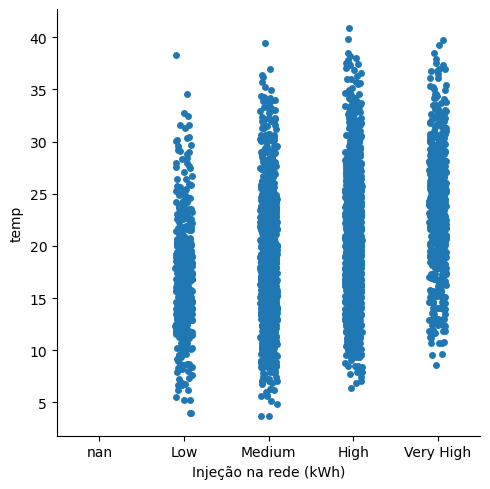

In [16]:
sns.catplot(x='Injeção na rede (kWh)', y="temp", data=energia_meteo)

/home/dinis/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


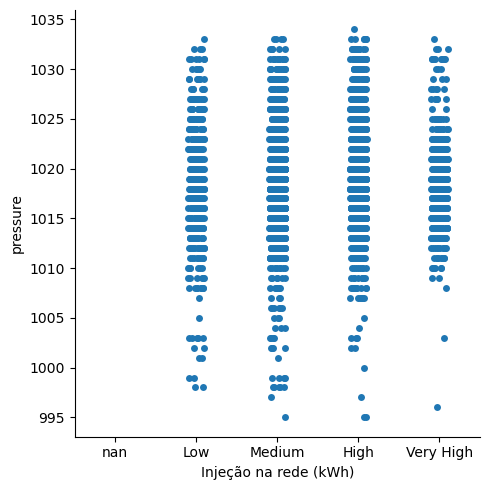

In [17]:
sns.catplot(x='Injeção na rede (kWh)', y="pressure", data=energia_meteo)

In [18]:
#Feature Eng
one_hot_encoded = pd.get_dummies(energia_meteo['weather_description'], prefix='weather', dtype=int)
energia_meteo = pd.concat([energia_meteo, one_hot_encoded], axis=1)
energia_meteo = energia_meteo.drop('weather_description', axis=1)

one_hot_encoded2 = pd.get_dummies(test_data['weather_description'], prefix='weather', dtype=int)
test_data = pd.concat([test_data, one_hot_encoded2], axis=1)
test_data = test_data.drop('weather_description', axis=1)

energia_meteo

,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,Data,Hora,...,Autoconsumo (kWh),Injeção na rede (kWh),weather_broken clouds,weather_few clouds,weather_heavy intensity rain,weather_light rain,weather_moderate rain,weather_overcast clouds,weather_scattered clouds,weather_sky is clear
0,13.97,13.54,11.45,14.04,1027,81,1.96,87,2021-09-29,0,...,0.0,NaN,0,0,0,0,0,1,0,0
1,13.48,13.02,13.43,13.90,1028,82,1.83,91,2021-09-29,1,...,0.0,NaN,0,0,0,0,0,1,0,0
2,12.93,12.47,12.72,13.43,1027,84,1.96,93,2021-09-29,2,...,0.0,NaN,0,0,0,0,0,1,0,0
3,12.61,12.15,10.34,12.93,1027,85,1.85,95,2021-09-29,3,...,0.0,NaN,0,0,0,0,0,1,0,0
4,12.61,12.17,9.79,12.93,1027,86,1.83,93,2021-09-29,4,...,0.0,NaN,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11011,15.70,15.57,15.57,15.72,1018,86,5.56,100,2022-12-31,19,...,0.0,NaN,0,0,0,0,1,0,0,0
11012,15.55,15.43,12.72,15.70,1018,87,4.47,100,2022-12-31,20,...,0.0,NaN,0,0,1,0,0,0,0,0
11013,13.45,13.28,12.23,13.99,1019,93,3.29,100,2022-12-31,21,...,0.0,NaN,0,0,1,0,0,0,0,0
11014,12.93,12.73,12.23,13.43,1019,94,1.49,100,2022-12-31,22,...,0.0,NaN,0,0,0,0,1,0,0,0


In [19]:
# Create date features
energia_meteo['Data'] = pd.to_datetime(energia_meteo['Data'], format='%Y-%m-%d')
    
energia_meteo['Year'] = energia_meteo['Data'].apply(lambda x: x.year)
energia_meteo['Month'] = energia_meteo['Data'].apply(lambda x: x.month)
energia_meteo['Day'] = energia_meteo['Data'].apply(lambda x: x.day)
    
energia_meteo = energia_meteo.drop('Data', axis=1)

# Create date features
test_data['Data'] = pd.to_datetime(test_data['Data'], format='%Y-%m-%d')
    
test_data['Year'] = test_data['Data'].apply(lambda x: x.year)
test_data['Month'] = test_data['Data'].apply(lambda x: x.month)
test_data['Day'] = test_data['Data'].apply(lambda x: x.day)
    
test_data = test_data.drop('Data', axis=1)


In [20]:
ordinal_mapping = {'Low': 1, 'Medium': 2, 'High': 3 , 'Very High': 4}
energia_meteo['Injeção na rede (kWh)'] = energia_meteo['Injeção na rede (kWh)'].map(ordinal_mapping).fillna(0).astype(numpy.int_)

In [21]:
energia_meteo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   temp                          11016 non-null  float64
 1   feels_like                    11016 non-null  float64
 2   temp_min                      11016 non-null  float64
 3   temp_max                      11016 non-null  float64
 4   pressure                      11016 non-null  int64  
 5   humidity                      11016 non-null  int64  
 6   wind_speed                    11016 non-null  float64
 7   clouds_all                    11016 non-null  int64  
 8   Hora                          11016 non-null  int64  
 9   Normal (kWh)                  11016 non-null  float64
 10  Horário Económico (kWh)       11016 non-null  float64
 11  Autoconsumo (kWh)             11016 non-null  float64
 12  Injeção na rede (kWh)         11016 non-null  int64  
 13  w

In [22]:
energia_meteo.isnull().sum()

temp                            0
feels_like                      0
temp_min                        0
temp_max                        0
pressure                        0
humidity                        0
wind_speed                      0
clouds_all                      0
Hora                            0
Normal (kWh)                    0
Horário Económico (kWh)         0
Autoconsumo (kWh)               0
Injeção na rede (kWh)           0
weather_broken clouds           0
weather_few clouds              0
weather_heavy intensity rain    0
weather_light rain              0
weather_moderate rain           0
weather_overcast clouds         0
weather_scattered clouds        0
weather_sky is clear            0
Year                            0
Month                           0
Day                             0
dtype: int64

In [23]:
energia_meteo

,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,Hora,Normal (kWh),...,weather_few clouds,weather_heavy intensity rain,weather_light rain,weather_moderate rain,weather_overcast clouds,weather_scattered clouds,weather_sky is clear,Year,Month,Day
0,13.97,13.54,11.45,14.04,1027,81,1.96,87,0,0.000,...,0,0,0,0,1,0,0,2021,9,29
1,13.48,13.02,13.43,13.90,1028,82,1.83,91,1,0.000,...,0,0,0,0,1,0,0,2021,9,29
2,12.93,12.47,12.72,13.43,1027,84,1.96,93,2,0.000,...,0,0,0,0,1,0,0,2021,9,29
3,12.61,12.15,10.34,12.93,1027,85,1.85,95,3,0.000,...,0,0,0,0,1,0,0,2021,9,29
4,12.61,12.17,9.79,12.93,1027,86,1.83,93,4,0.000,...,0,0,0,0,1,0,0,2021,9,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11011,15.70,15.57,15.57,15.72,1018,86,5.56,100,19,1.693,...,0,0,0,1,0,0,0,2022,12,31
11012,15.55,15.43,12.72,15.70,1018,87,4.47,100,20,1.327,...,0,1,0,0,0,0,0,2022,12,31
11013,13.45,13.28,12.23,13.99,1019,93,3.29,100,21,0.757,...,0,1,0,0,0,0,0,2022,12,31
11014,12.93,12.73,12.23,13.43,1019,94,1.49,100,22,0.000,...,0,0,0,1,0,0,0,2022,12,31


In [24]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   temp                          1752 non-null   float64
 1   feels_like                    1752 non-null   float64
 2   temp_min                      1752 non-null   float64
 3   temp_max                      1752 non-null   float64
 4   pressure                      1752 non-null   float64
 5   humidity                      1752 non-null   float64
 6   wind_speed                    1752 non-null   float64
 7   clouds_all                    1752 non-null   float64
 8   Hora                          2256 non-null   int64  
 9   Normal (kWh)                  2256 non-null   float64
 10  Horário Económico (kWh)       2256 non-null   float64
 11  Autoconsumo (kWh)             2256 non-null   float64
 12  weather_broken clouds         2256 non-null   int64  
 13  wea

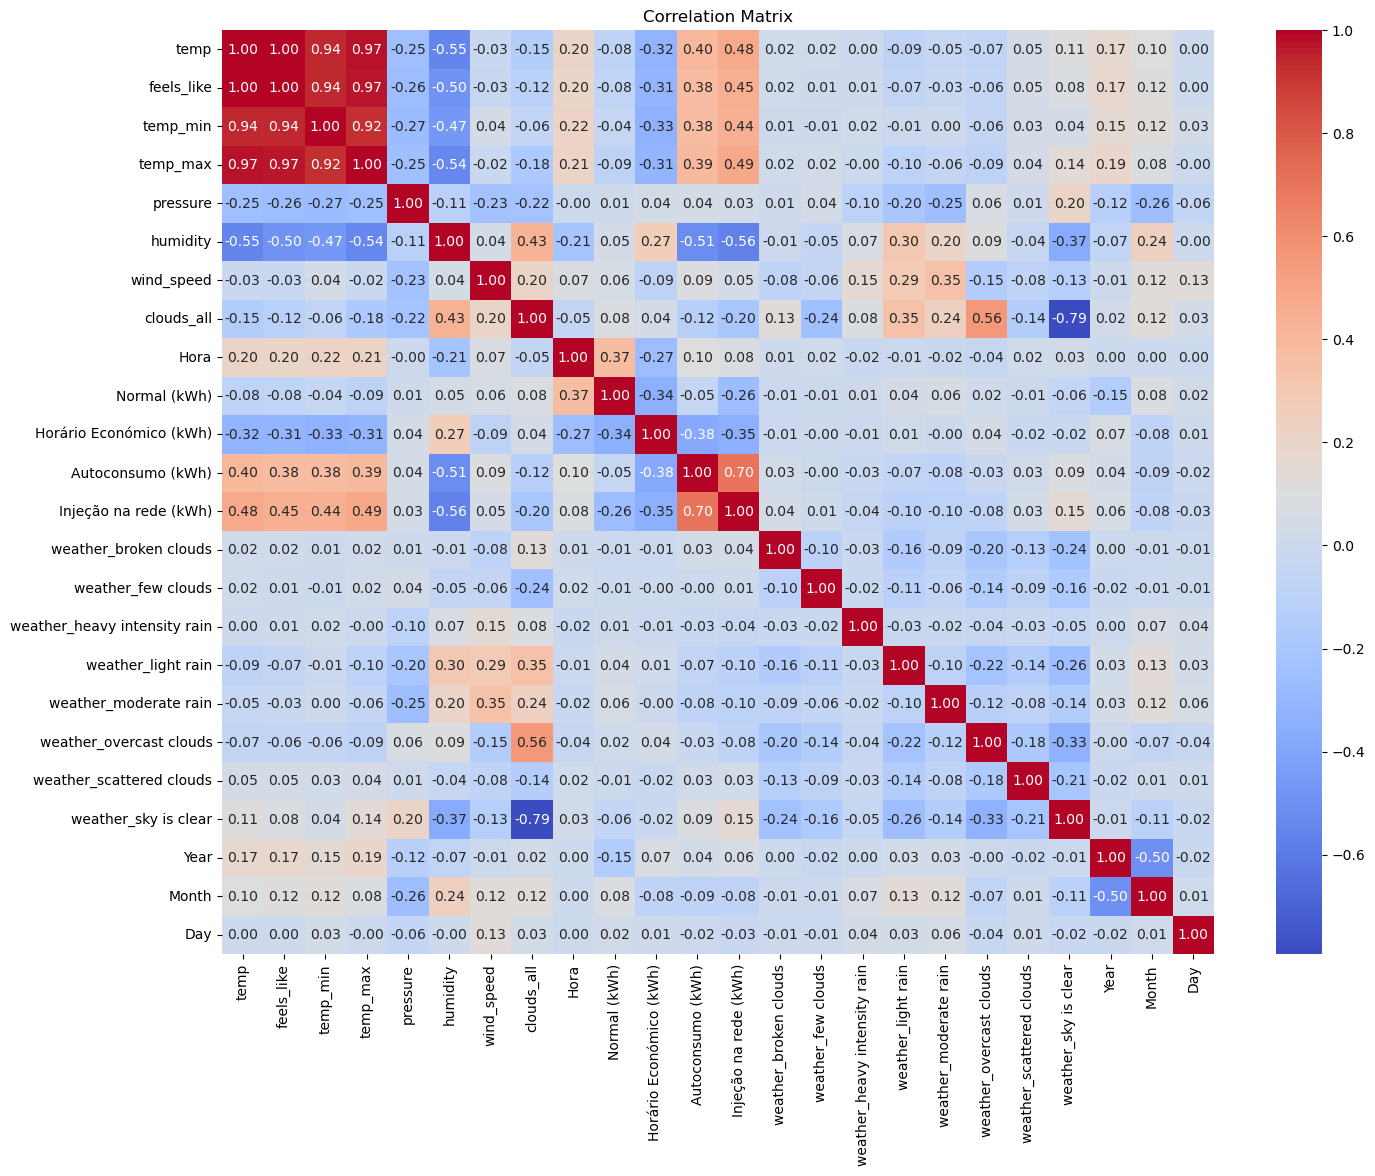

In [25]:
# Calculate the correlation matrix
corr_matrix = energia_meteo.corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(16, 12))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

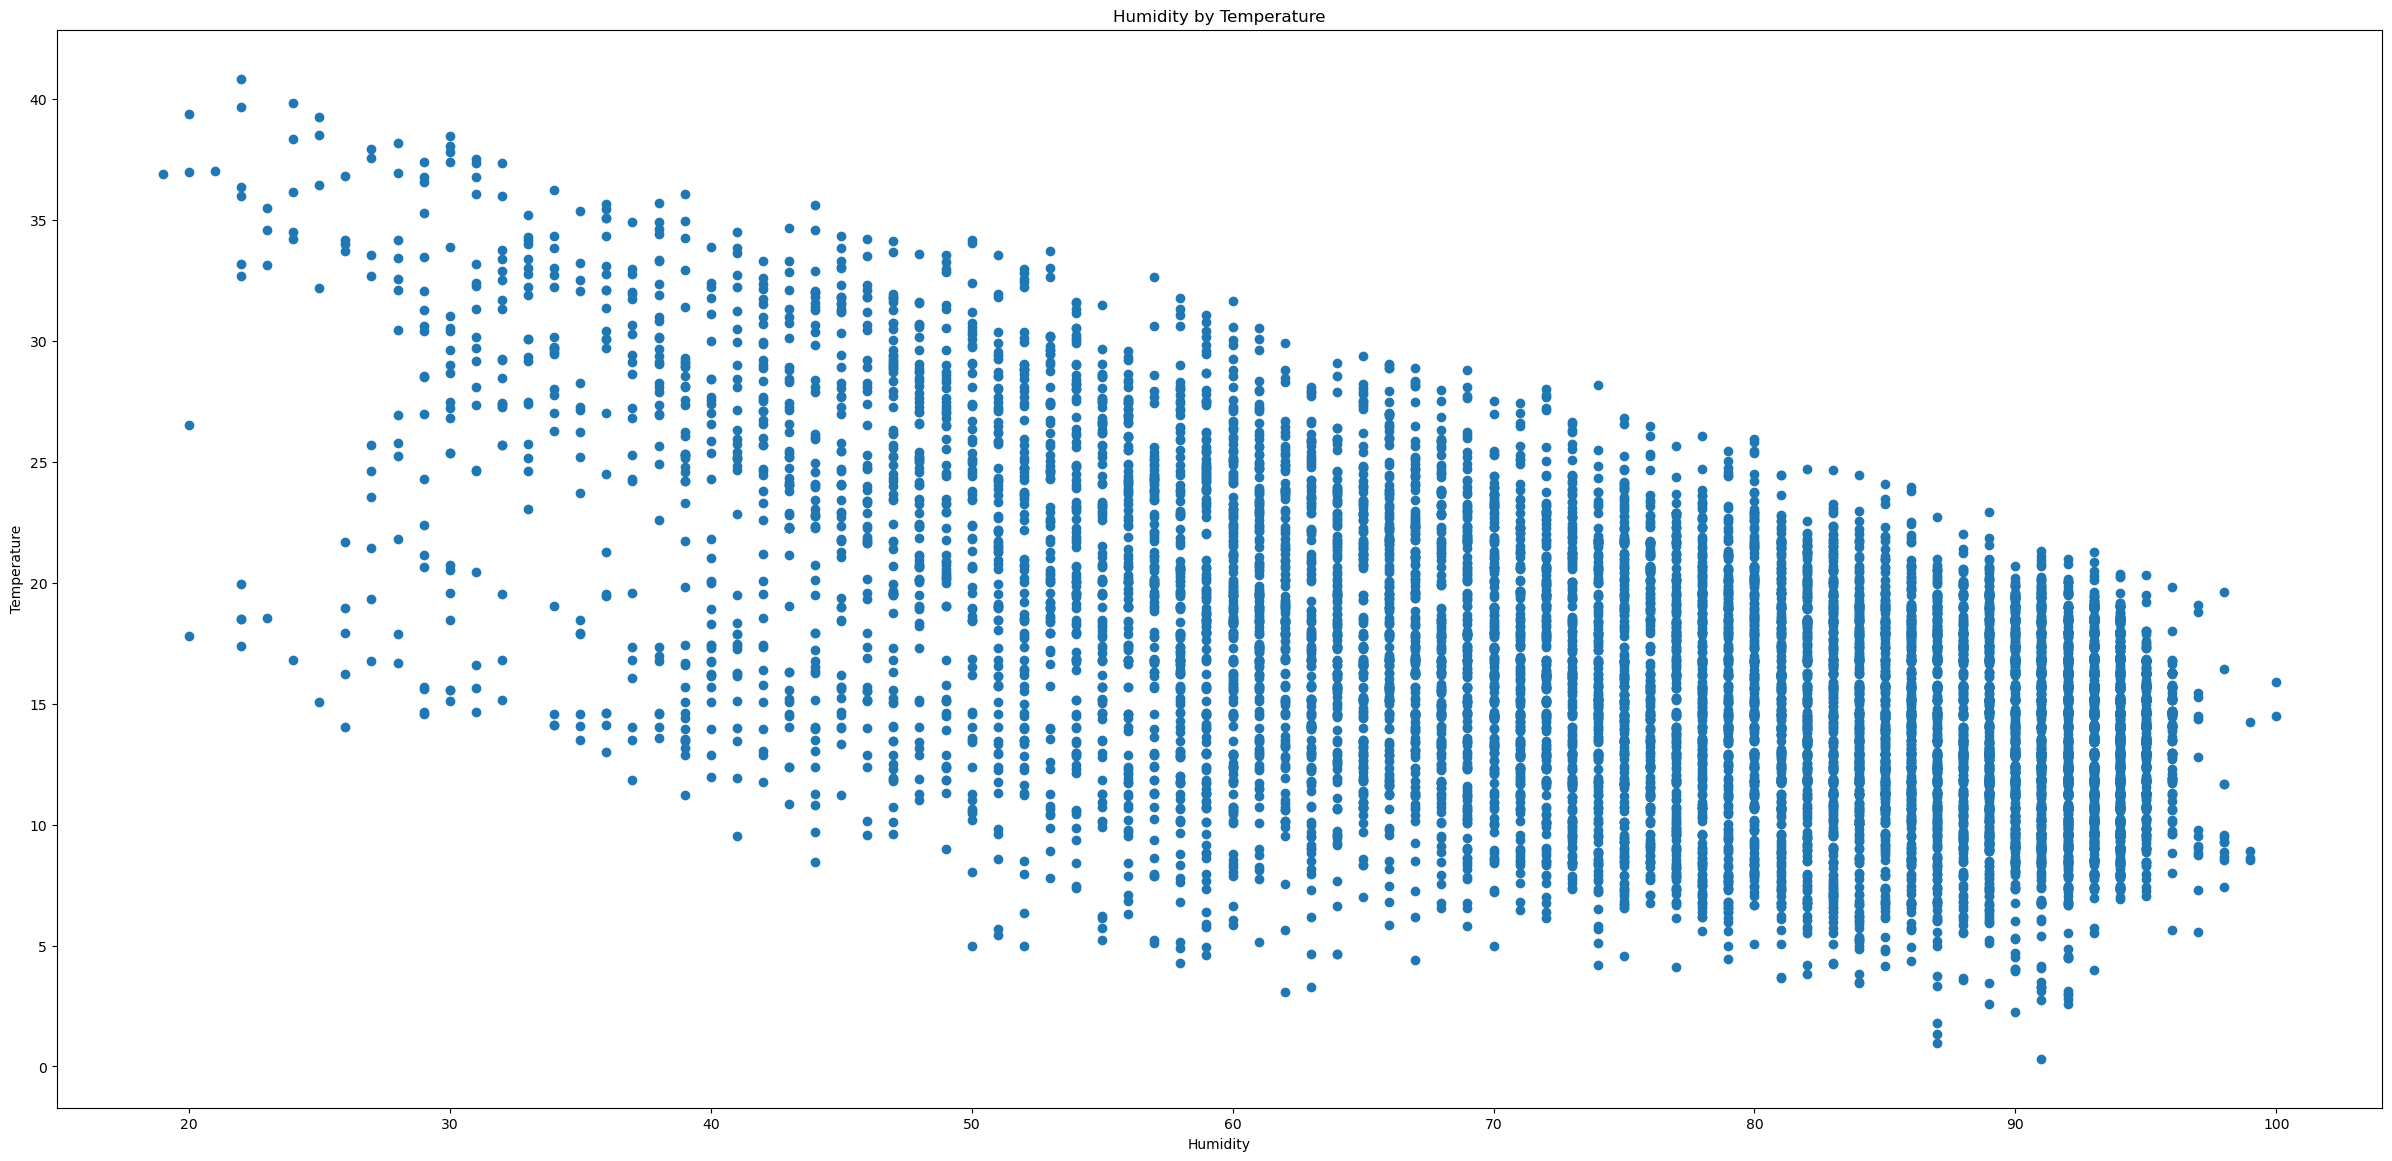

In [26]:
plt.figure(figsize=(30, 14))
plt.scatter(energia_meteo['humidity'], energia_meteo['temp'])
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.title('Humidity by Temperature')
plt.grid(False)
plt.show()

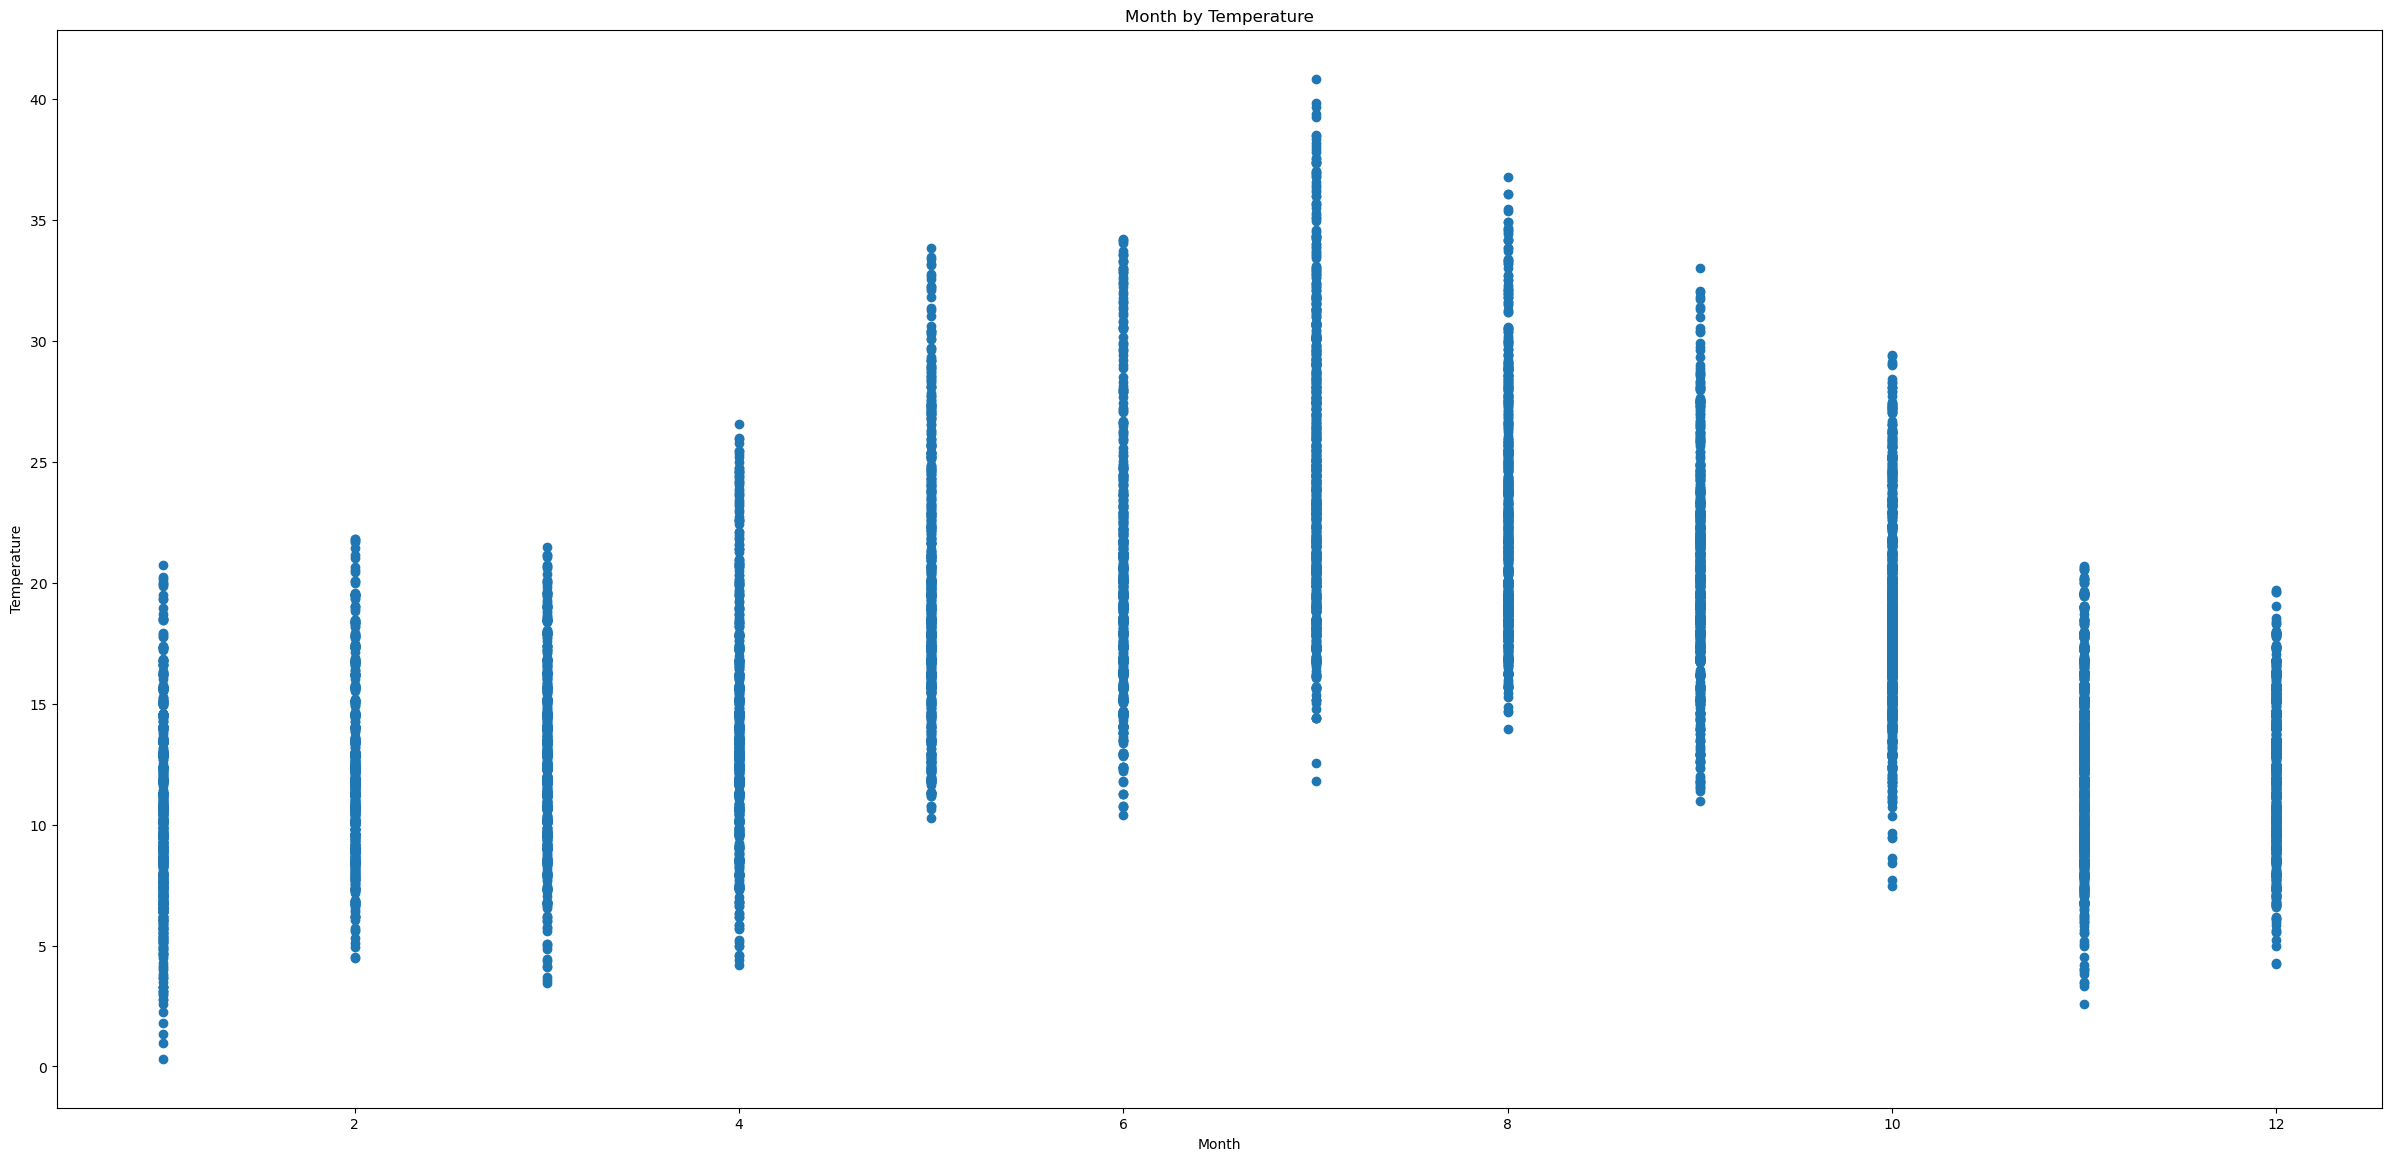

In [27]:
plt.figure(figsize=(30, 14))
plt.scatter(energia_meteo['Month'], energia_meteo['temp'])
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.title('Month by Temperature')
plt.grid(False)
plt.show()

In [28]:
test_data.isnull().sum()

temp                            504
feels_like                      504
temp_min                        504
temp_max                        504
pressure                        504
humidity                        504
wind_speed                      504
clouds_all                      504
Hora                              0
Normal (kWh)                      0
Horário Económico (kWh)           0
Autoconsumo (kWh)                 0
weather_broken clouds             0
weather_few clouds                0
weather_heavy intensity rain      0
weather_light rain                0
weather_moderate rain             0
weather_overcast clouds           0
weather_scattered clouds          0
weather_sky is clear              0
Year                              0
Month                             0
Day                               0
dtype: int64

In [29]:
test_data

,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,Hora,Normal (kWh),...,weather_few clouds,weather_heavy intensity rain,weather_light rain,weather_moderate rain,weather_overcast clouds,weather_scattered clouds,weather_sky is clear,Year,Month,Day
0,12.93,12.76,12.72,13.43,1019.0,95.0,2.02,100.0,0,0.000,...,0,0,0,1,0,0,0,2023,1,1
1,13.49,13.38,13.43,13.90,1018.0,95.0,2.18,100.0,1,0.000,...,0,0,0,1,0,0,0,2023,1,1
2,13.55,13.44,13.48,14.82,1017.0,95.0,2.88,100.0,2,0.000,...,0,0,0,1,0,0,0,2023,1,1
3,13.61,13.51,12.01,14.82,1016.0,95.0,3.63,100.0,3,0.000,...,0,0,0,1,0,0,0,2023,1,1
4,13.59,13.49,12.01,14.82,1015.0,95.0,4.58,100.0,4,0.000,...,0,0,0,1,0,0,0,2023,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,0.953,...,0,0,0,0,0,0,0,2023,4,4
2252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,0.915,...,0,0,0,0,0,0,0,2023,4,4
2253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,0.479,...,0,0,0,0,0,0,0,2023,4,4
2254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,0.000,...,0,0,0,0,0,0,0,2023,4,4


In [30]:
import requests
from datetime import datetime, timedelta
import pandas as pd

# Replace 'YOUR_API_KEY' with the API key you obtained from OpenWeatherMap
api_key = '75376d2f09312a6f3c0837dcab510d6f'

# Specify the city and country code (e.g., 'London,GB')
city = 'Braga'
country_code = 'PT'

# Specify the start and end dates for the weather data
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 4, 4)

# Initialize an empty list to store weather data
weather_data = []

# Loop through the date range and make API requests
current_date = datetime(2023, 1, 1)
while current_date <= end_date:
    next_date = current_date + timedelta(days=7)
    
    # Convert the date to Unix timestamp
    curr_timestamp = int(current_date.timestamp())
    next_timestamp = int(next_date.timestamp())
    
    response = requests.get(f'https://history.openweathermap.org/data/2.5/history/city?lat=41.5378&lon=-8.4323&type=hour&start={curr_timestamp}&end={next_timestamp}&units=metric&appid=75376d2f09312a6f3c0837dcab510d6f')
    data = response.json()

    # Append the weather data to the list
    weather_data.extend(data['list'])

    # Move to the next day
    current_date = next_date

# Process the weather data and create a Pandas DataFrame
weather_records = []
for data_point in weather_data:
    # Extract relevant information from the API response
    date = datetime.utcfromtimestamp(data_point['dt'])
    temperature = data_point['main']['temp']
    min_ = data_point['main']['temp_min']
    max_ = data_point['main']['temp_max']
    pressure = data_point['main']['pressure']
    humidity = data_point['main']['humidity']
    wind = data_point['wind']['speed']
    clouds = data_point['clouds']['all']
    weather_description = data_point['weather'][0]['description']

    # Append the data as a dictionary
    weather_records.append({
        'Date': date,
        'temp': temperature,
        'temp_min': min_,
        'temp_max': max_,
        'pressure': pressure,
        'clouds_all': clouds,
        'humidity': humidity,
        'wind_speed': wind,
        'weather_description': weather_description
    })

# Create a Pandas DataFrame
df = pd.DataFrame(weather_records)
df = df[:-96]

df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Hora'] = df['Date'].dt.hour

df = df.drop('Date', axis=1)

one_hot_encoded = pd.get_dummies(df['weather_description'], prefix='weather', dtype=int)
df = pd.concat([df, one_hot_encoded], axis=1)
df = df.drop('weather_description', axis=1)


In [31]:
df

,temp,temp_min,temp_max,pressure,clouds_all,humidity,wind_speed,Day,Month,Year,Hora,weather_broken clouds,weather_clear sky,weather_few clouds,weather_light rain,weather_moderate rain,weather_overcast clouds,weather_scattered clouds
0,12.34,11.42,12.84,1018,100,95,2.75,1,1,2023,0,0,0,0,1,0,0,0
1,12.87,11.42,13.31,1017,100,95,4.48,1,1,2023,1,0,0,0,1,0,0,0
2,13.19,12.89,14.13,1016,100,95,4.87,1,1,2023,2,0,0,0,1,0,0,0
3,12.93,11.42,14.13,1015,100,95,5.03,1,1,2023,3,0,0,0,1,0,0,0
4,12.89,12.84,13.31,1015,100,95,5.49,1,1,2023,4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2264,17.13,17.13,17.13,1016,5,49,0.86,4,4,2023,19,0,1,0,0,0,0,0
2265,15.13,15.13,15.13,1017,2,51,1.71,4,4,2023,20,0,1,0,0,0,0,0
2266,13.13,13.13,13.13,1018,2,51,2.00,4,4,2023,21,0,1,0,0,0,0,0
2267,11.13,11.13,14.75,1019,2,51,2.23,4,4,2023,22,0,1,0,0,0,0,0


In [32]:
df.drop(df.head(1762).index, inplace=True)
df = df.drop_duplicates()

In [33]:
df

,temp,temp_min,temp_max,pressure,clouds_all,humidity,wind_speed,Day,Month,Year,Hora,weather_broken clouds,weather_clear sky,weather_few clouds,weather_light rain,weather_moderate rain,weather_overcast clouds,weather_scattered clouds
1762,9.53,6.90,11.18,1022,18,92,1.22,15,3,2023,0,0,0,1,0,0,0,0
1763,9.56,8.86,10.62,1022,8,92,1.37,15,3,2023,1,0,1,0,0,0,0,0
1764,8.99,8.13,10.07,1022,6,93,1.52,15,3,2023,2,0,1,0,0,0,0,0
1765,8.98,7.75,9.51,1021,4,93,1.51,15,3,2023,3,0,1,0,0,0,0,0
1766,9.38,5.23,9.56,1020,3,93,1.42,15,3,2023,4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2264,17.13,17.13,17.13,1016,5,49,0.86,4,4,2023,19,0,1,0,0,0,0,0
2265,15.13,15.13,15.13,1017,2,51,1.71,4,4,2023,20,0,1,0,0,0,0,0
2266,13.13,13.13,13.13,1018,2,51,2.00,4,4,2023,21,0,1,0,0,0,0,0
2267,11.13,11.13,14.75,1019,2,51,2.23,4,4,2023,22,0,1,0,0,0,0,0


In [34]:
test_data2 = test_data.copy()
test_data2.drop(test_data2.head(1752).index, inplace=True)

In [35]:
# Merge datasets based on 'month' and 'day'
merged_dataset = pd.merge(test_data2, df, on=['Month', 'Day', 'Year', 'Hora'], how='left', suffixes=('_dataset1', '_dataset2'))

merged_dataset['temp_dataset1'] = merged_dataset['temp_dataset1'].fillna(merged_dataset['temp_dataset2'])
merged_dataset['temp_min_dataset1'] = merged_dataset['temp_min_dataset1'].fillna(merged_dataset['temp_min_dataset2'])
merged_dataset['temp_max_dataset1'] = merged_dataset['temp_max_dataset1'].fillna(merged_dataset['temp_max_dataset2'])
merged_dataset['pressure_dataset1'] = merged_dataset['pressure_dataset1'].fillna(merged_dataset['pressure_dataset2'])
merged_dataset['humidity_dataset1'] = merged_dataset['humidity_dataset1'].fillna(merged_dataset['humidity_dataset2'])
merged_dataset['wind_speed_dataset1'] = merged_dataset['wind_speed_dataset1'].fillna(merged_dataset['wind_speed_dataset2'])
merged_dataset['clouds_all_dataset1'] = merged_dataset['clouds_all_dataset1'].fillna(merged_dataset['clouds_all_dataset2'])
merged_dataset = merged_dataset.drop('weather_broken clouds_dataset1', axis=1)
merged_dataset = merged_dataset.drop('weather_few clouds_dataset1', axis=1)
merged_dataset = merged_dataset.drop('weather_light rain_dataset1', axis=1)
merged_dataset = merged_dataset.drop('weather_moderate rain_dataset1', axis=1)
merged_dataset = merged_dataset.drop('weather_overcast clouds_dataset1', axis=1)
merged_dataset = merged_dataset.drop('weather_scattered clouds_dataset1', axis=1)
merged_dataset = merged_dataset.drop('weather_sky is clear', axis=1)
merged_dataset = merged_dataset.drop('temp_dataset2', axis=1)
merged_dataset = merged_dataset.drop('temp_min_dataset2', axis=1)
merged_dataset = merged_dataset.drop('temp_max_dataset2', axis=1)
merged_dataset = merged_dataset.drop('pressure_dataset2', axis=1)
merged_dataset = merged_dataset.drop('clouds_all_dataset2', axis=1)
merged_dataset = merged_dataset.drop('humidity_dataset2', axis=1)
merged_dataset = merged_dataset.drop('wind_speed_dataset2', axis=1)

new_column_names = {'temp_dataset1': 'temp', 
                    'temp_min_dataset1': 'temp_min',
                    'temp_max_dataset1': 'temp_max',
                    'pressure_dataset1': 'pressure',
                    'humidity_dataset1': 'humidity',
                    'wind_speed_dataset1': 'wind_speed',
                    'clouds_all_dataset1': 'clouds_all',
                    'weather_broken clouds_dataset2': 'weather_broken clouds',
                    'weather_clear sky': 'weather_sky is clear',
                    'weather_few clouds_dataset2': 'weather_few clouds',
                    'weather_light rain_dataset2': 'weather_light rain',
                    'weather_moderate rain_dataset2': 'weather_moderate rain',
                    'weather_overcast clouds_dataset2': 'weather_overcast clouds',
                    'weather_scattered clouds_dataset2': 'weather_scattered clouds',
                   }
merged_dataset.rename(columns=new_column_names, inplace=True)

In [36]:
merged_dataset

,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,Hora,Normal (kWh),...,Year,Month,Day,weather_broken clouds,weather_sky is clear,weather_few clouds,weather_light rain,weather_moderate rain,weather_overcast clouds,weather_scattered clouds
0,9.53,NaN,6.90,11.18,1022.0,92.0,1.22,18.0,0,0.000,...,2023,3,15,0,0,1,0,0,0,0
1,9.56,NaN,8.86,10.62,1022.0,92.0,1.37,8.0,1,0.000,...,2023,3,15,0,1,0,0,0,0,0
2,8.99,NaN,8.13,10.07,1022.0,93.0,1.52,6.0,2,0.000,...,2023,3,15,0,1,0,0,0,0,0
3,8.98,NaN,7.75,9.51,1021.0,93.0,1.51,4.0,3,0.000,...,2023,3,15,0,1,0,0,0,0,0
4,9.38,NaN,5.23,9.56,1020.0,93.0,1.42,3.0,4,0.000,...,2023,3,15,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,17.13,NaN,17.13,17.13,1016.0,49.0,0.86,5.0,19,0.953,...,2023,4,4,0,1,0,0,0,0,0
500,15.13,NaN,15.13,15.13,1017.0,51.0,1.71,2.0,20,0.915,...,2023,4,4,0,1,0,0,0,0,0
501,13.13,NaN,13.13,13.13,1018.0,51.0,2.00,2.0,21,0.479,...,2023,4,4,0,1,0,0,0,0,0
502,11.13,NaN,11.13,14.75,1019.0,51.0,2.23,2.0,22,0.000,...,2023,4,4,0,1,0,0,0,0,0


In [37]:
merged_dataset.to_csv('api.csv', index=False)
test_data2 = pd.read_csv('api.csv')

test_data.drop(test_data.tail(504).index, inplace=True)
test_data = pd.concat([test_data, test_data2], ignore_index=True)

In [38]:
test_data

,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,Hora,Normal (kWh),...,weather_few clouds,weather_heavy intensity rain,weather_light rain,weather_moderate rain,weather_overcast clouds,weather_scattered clouds,weather_sky is clear,Year,Month,Day
0,12.93,12.76,12.72,13.43,1019.0,95.0,2.02,100.0,0,0.000,...,0,0,0,1,0,0,0,2023,1,1
1,13.49,13.38,13.43,13.90,1018.0,95.0,2.18,100.0,1,0.000,...,0,0,0,1,0,0,0,2023,1,1
2,13.55,13.44,13.48,14.82,1017.0,95.0,2.88,100.0,2,0.000,...,0,0,0,1,0,0,0,2023,1,1
3,13.61,13.51,12.01,14.82,1016.0,95.0,3.63,100.0,3,0.000,...,0,0,0,1,0,0,0,2023,1,1
4,13.59,13.49,12.01,14.82,1015.0,95.0,4.58,100.0,4,0.000,...,0,0,0,1,0,0,0,2023,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,17.13,NaN,17.13,17.13,1016.0,49.0,0.86,5.0,19,0.953,...,0,0,0,0,0,0,1,2023,4,4
2252,15.13,NaN,15.13,15.13,1017.0,51.0,1.71,2.0,20,0.915,...,0,0,0,0,0,0,1,2023,4,4
2253,13.13,NaN,13.13,13.13,1018.0,51.0,2.00,2.0,21,0.479,...,0,0,0,0,0,0,1,2023,4,4
2254,11.13,NaN,11.13,14.75,1019.0,51.0,2.23,2.0,22,0.000,...,0,0,0,0,0,0,1,2023,4,4


In [39]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   temp                          504 non-null    float64
 1   feels_like                    0 non-null      float64
 2   temp_min                      504 non-null    float64
 3   temp_max                      504 non-null    float64
 4   pressure                      504 non-null    float64
 5   humidity                      504 non-null    float64
 6   wind_speed                    504 non-null    float64
 7   clouds_all                    504 non-null    float64
 8   Hora                          504 non-null    int64  
 9   Normal (kWh)                  504 non-null    float64
 10  Horário Económico (kWh)       504 non-null    float64
 11  Autoconsumo (kWh)             504 non-null    float64
 12  weather_heavy intensity rain  504 non-null    int64  
 13  Year 

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 504 entries, 1762 to 2268
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   temp                      504 non-null    float64
 1   temp_min                  504 non-null    float64
 2   temp_max                  504 non-null    float64
 3   pressure                  504 non-null    int64  
 4   clouds_all                504 non-null    int64  
 5   humidity                  504 non-null    int64  
 6   wind_speed                504 non-null    float64
 7   Day                       504 non-null    int32  
 8   Month                     504 non-null    int32  
 9   Year                      504 non-null    int32  
 10  Hora                      504 non-null    int32  
 11  weather_broken clouds     504 non-null    int64  
 12  weather_clear sky         504 non-null    int64  
 13  weather_few clouds        504 non-null    int64  
 14  weather_lig

In [41]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   temp                          2256 non-null   float64
 1   feels_like                    1752 non-null   float64
 2   temp_min                      2256 non-null   float64
 3   temp_max                      2256 non-null   float64
 4   pressure                      2256 non-null   float64
 5   humidity                      2256 non-null   float64
 6   wind_speed                    2256 non-null   float64
 7   clouds_all                    2256 non-null   float64
 8   Hora                          2256 non-null   int64  
 9   Normal (kWh)                  2256 non-null   float64
 10  Horário Económico (kWh)       2256 non-null   float64
 11  Autoconsumo (kWh)             2256 non-null   float64
 12  weather_broken clouds         2256 non-null   int64  
 13  wea

In [42]:
#sns.pairplot(energia_meteo, height=3)

In [43]:
#models
!pip install scikit-optimize
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn import metrics
from skopt import BayesSearchCV

In [44]:
X = energia_meteo.drop('Injeção na rede (kWh)', axis=1).copy()
y = energia_meteo['Injeção na rede (kWh)'].copy()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=2023)

In [45]:
!pip install scikeras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier

# Allow GPU memory growth
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

def build_model(activation='relu', learning_rate=0.01, dropout_rate=0.35):
    model = Sequential()
    model.add(Dense(64, activation=activation, input_shape=(X.shape[1],)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(5, activation='softmax'))

    optimizer = tf.optimizers.Adam(learning_rate)

    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy']
    )
    return model

optimizer = ['sgd', 'rmsprop', 'adagrad']  # Lowercased optimizer names
param_grid = dict(optimizer=optimizer)

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=2023)

# Wrap Keras model using KerasClassifier
model = KerasClassifier(model=build_model, batch_size=128, validation_split=0.3, epochs=100, verbose=0)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, scoring='accuracy', refit=True, verbose=1)

2023-12-23 19:58:14.358981: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-23 19:58:14.456692: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-23 19:58:14.456730: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-23 19:58:14.480008: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-23 19:58:14.524950: I tensorflow/core/platform/cpu_feature_guar

In [46]:
grid_search.fit(X_train, y_train)

2023-12-23 19:58:15.791997: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-23 19:58:15.792201: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-23 19:58:15.792274: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Fitting 10 folds for each of 3 candidates, totalling 30 fits


2023-12-23 19:58:16.357485: W external/local_xla/xla/service/gpu/llvm_gpu_backend/gpu_backend_lib.cc:504] Can't find libdevice directory ${CUDA_DIR}/nvvm/libdevice. This may result in compilation or runtime failures, if the program we try to run uses routines from libdevice.
Searched for CUDA in the following directories:
  ./cuda_sdk_lib
  /usr/local/cuda-12.2
  /usr/local/cuda
  /home/dinis/miniconda3/lib/python3.11/site-packages/tensorflow/python/platform/../../../nvidia/cuda_nvcc
  /home/dinis/miniconda3/lib/python3.11/site-packages/tensorflow/python/platform/../../../../nvidia/cuda_nvcc
  .
You can choose the search directory by setting xla_gpu_cuda_data_dir in HloModule's DebugOptions.  For most apps, setting the environment variable XLA_FLAGS=--xla_gpu_cuda_data_dir=/path/to/cuda will work.
2023-12-23 19:58:16.372365: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-23 19:58:16.372937: I external/loc

ValueError: 
All the 30 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/tensorflow/python/eager/execute.py", line 59, in quick_execute
    except TypeError as e:
tensorflow.python.framework.errors_impl.InternalError: Graph execution error:

Detected at node Adam/StatefulPartitionedCall_4 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 505, in process_one

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 740, in execute_request

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 422, in do_execute

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 546, in run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code

  File "/tmp/ipykernel_403514/20025057.py", line 1, in <module>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 874, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 1388, in _run_search

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 821, in evaluate_candidates

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/utils/parallel.py", line 63, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 1085, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 901, in dispatch_one_batch

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 819, in _dispatch

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/_parallel_backends.py", line 208, in apply_async

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/_parallel_backends.py", line 597, in __init__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 288, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 288, in <listcomp>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/utils/parallel.py", line 123, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 928, in _fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1154, in train_step

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 544, in minimize

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1223, in apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 652, in apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1253, in _internal_apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1345, in _distributed_apply_gradients_fn

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1340, in apply_grad_to_update_var

libdevice not found at ./libdevice.10.bc
	 [[{{node Adam/StatefulPartitionedCall_4}}]] [Op:__inference_train_function_979]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/tensorflow/python/eager/execute.py", line 59, in quick_execute
    except TypeError as e:
tensorflow.python.framework.errors_impl.InternalError: Graph execution error:

Detected at node Adam/StatefulPartitionedCall_4 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 505, in process_one

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 740, in execute_request

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 422, in do_execute

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 546, in run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code

  File "/tmp/ipykernel_403514/20025057.py", line 1, in <module>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 874, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 1388, in _run_search

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 821, in evaluate_candidates

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/utils/parallel.py", line 63, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 1088, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 901, in dispatch_one_batch

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 819, in _dispatch

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/_parallel_backends.py", line 208, in apply_async

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/_parallel_backends.py", line 597, in __init__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 288, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 288, in <listcomp>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/utils/parallel.py", line 123, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 928, in _fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1154, in train_step

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 544, in minimize

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1223, in apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 652, in apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1253, in _internal_apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1345, in _distributed_apply_gradients_fn

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1340, in apply_grad_to_update_var

libdevice not found at ./libdevice.10.bc
	 [[{{node Adam/StatefulPartitionedCall_4}}]] [Op:__inference_train_function_1957]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/tensorflow/python/eager/execute.py", line 59, in quick_execute
    except TypeError as e:
tensorflow.python.framework.errors_impl.InternalError: Graph execution error:

Detected at node Adam/StatefulPartitionedCall_4 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 505, in process_one

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 740, in execute_request

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 422, in do_execute

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 546, in run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code

  File "/tmp/ipykernel_403514/20025057.py", line 1, in <module>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 874, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 1388, in _run_search

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 821, in evaluate_candidates

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/utils/parallel.py", line 63, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 1088, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 901, in dispatch_one_batch

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 819, in _dispatch

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/_parallel_backends.py", line 208, in apply_async

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/_parallel_backends.py", line 597, in __init__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 288, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 288, in <listcomp>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/utils/parallel.py", line 123, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 928, in _fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1154, in train_step

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 544, in minimize

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1223, in apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 652, in apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1253, in _internal_apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1345, in _distributed_apply_gradients_fn

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1340, in apply_grad_to_update_var

libdevice not found at ./libdevice.10.bc
	 [[{{node Adam/StatefulPartitionedCall_4}}]] [Op:__inference_train_function_2935]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/tensorflow/python/eager/execute.py", line 59, in quick_execute
    except TypeError as e:
tensorflow.python.framework.errors_impl.InternalError: Graph execution error:

Detected at node Adam/StatefulPartitionedCall_5 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 505, in process_one

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 740, in execute_request

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 422, in do_execute

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 546, in run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code

  File "/tmp/ipykernel_403514/20025057.py", line 1, in <module>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 874, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 1388, in _run_search

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 821, in evaluate_candidates

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/utils/parallel.py", line 63, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 1088, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 901, in dispatch_one_batch

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 819, in _dispatch

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/_parallel_backends.py", line 208, in apply_async

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/_parallel_backends.py", line 597, in __init__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 288, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 288, in <listcomp>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/utils/parallel.py", line 123, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 928, in _fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1154, in train_step

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 544, in minimize

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1223, in apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 652, in apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1253, in _internal_apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1345, in _distributed_apply_gradients_fn

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1340, in apply_grad_to_update_var

libdevice not found at ./libdevice.10.bc
	 [[{{node Adam/StatefulPartitionedCall_5}}]] [Op:__inference_train_function_3913]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/tensorflow/python/eager/execute.py", line 59, in quick_execute
    except TypeError as e:
tensorflow.python.framework.errors_impl.InternalError: Graph execution error:

Detected at node Adam/StatefulPartitionedCall_4 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 505, in process_one

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 740, in execute_request

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 422, in do_execute

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 546, in run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code

  File "/tmp/ipykernel_403514/20025057.py", line 1, in <module>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 874, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 1388, in _run_search

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 821, in evaluate_candidates

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/utils/parallel.py", line 63, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 1088, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 901, in dispatch_one_batch

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 819, in _dispatch

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/_parallel_backends.py", line 208, in apply_async

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/_parallel_backends.py", line 597, in __init__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 288, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 288, in <listcomp>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/utils/parallel.py", line 123, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 928, in _fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1154, in train_step

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 544, in minimize

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1223, in apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 652, in apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1253, in _internal_apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1345, in _distributed_apply_gradients_fn

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1340, in apply_grad_to_update_var

libdevice not found at ./libdevice.10.bc
	 [[{{node Adam/StatefulPartitionedCall_4}}]] [Op:__inference_train_function_4891]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/tensorflow/python/eager/execute.py", line 59, in quick_execute
    except TypeError as e:
tensorflow.python.framework.errors_impl.InternalError: Graph execution error:

Detected at node Adam/StatefulPartitionedCall_4 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 505, in process_one

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 740, in execute_request

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 422, in do_execute

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 546, in run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code

  File "/tmp/ipykernel_403514/20025057.py", line 1, in <module>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 874, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 1388, in _run_search

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 821, in evaluate_candidates

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/utils/parallel.py", line 63, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 1088, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 901, in dispatch_one_batch

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 819, in _dispatch

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/_parallel_backends.py", line 208, in apply_async

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/_parallel_backends.py", line 597, in __init__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 288, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 288, in <listcomp>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/utils/parallel.py", line 123, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 928, in _fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1154, in train_step

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 544, in minimize

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1223, in apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 652, in apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1253, in _internal_apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1345, in _distributed_apply_gradients_fn

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1340, in apply_grad_to_update_var

libdevice not found at ./libdevice.10.bc
	 [[{{node Adam/StatefulPartitionedCall_4}}]] [Op:__inference_train_function_5869]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/tensorflow/python/eager/execute.py", line 59, in quick_execute
    except TypeError as e:
tensorflow.python.framework.errors_impl.InternalError: Graph execution error:

Detected at node Adam/StatefulPartitionedCall_4 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 505, in process_one

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 740, in execute_request

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 422, in do_execute

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 546, in run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code

  File "/tmp/ipykernel_403514/20025057.py", line 1, in <module>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 874, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 1388, in _run_search

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 821, in evaluate_candidates

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/utils/parallel.py", line 63, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 1088, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 901, in dispatch_one_batch

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 819, in _dispatch

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/_parallel_backends.py", line 208, in apply_async

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/_parallel_backends.py", line 597, in __init__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 288, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 288, in <listcomp>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/utils/parallel.py", line 123, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 928, in _fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1154, in train_step

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 544, in minimize

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1223, in apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 652, in apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1253, in _internal_apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1345, in _distributed_apply_gradients_fn

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1340, in apply_grad_to_update_var

libdevice not found at ./libdevice.10.bc
	 [[{{node Adam/StatefulPartitionedCall_4}}]] [Op:__inference_train_function_6847]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/tensorflow/python/eager/execute.py", line 59, in quick_execute
    except TypeError as e:
tensorflow.python.framework.errors_impl.InternalError: Graph execution error:

Detected at node Adam/StatefulPartitionedCall_4 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 505, in process_one

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 740, in execute_request

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 422, in do_execute

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 546, in run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code

  File "/tmp/ipykernel_403514/20025057.py", line 1, in <module>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 874, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 1388, in _run_search

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 821, in evaluate_candidates

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/utils/parallel.py", line 63, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 1088, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 901, in dispatch_one_batch

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 819, in _dispatch

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/_parallel_backends.py", line 208, in apply_async

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/_parallel_backends.py", line 597, in __init__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 288, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 288, in <listcomp>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/utils/parallel.py", line 123, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 928, in _fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1154, in train_step

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 544, in minimize

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1223, in apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 652, in apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1253, in _internal_apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1345, in _distributed_apply_gradients_fn

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1340, in apply_grad_to_update_var

libdevice not found at ./libdevice.10.bc
	 [[{{node Adam/StatefulPartitionedCall_4}}]] [Op:__inference_train_function_7825]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/tensorflow/python/eager/execute.py", line 59, in quick_execute
    except TypeError as e:
tensorflow.python.framework.errors_impl.InternalError: Graph execution error:

Detected at node Adam/StatefulPartitionedCall_4 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 505, in process_one

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 740, in execute_request

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 422, in do_execute

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 546, in run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code

  File "/tmp/ipykernel_403514/20025057.py", line 1, in <module>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 874, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 1388, in _run_search

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 821, in evaluate_candidates

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/utils/parallel.py", line 63, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 1088, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 901, in dispatch_one_batch

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 819, in _dispatch

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/_parallel_backends.py", line 208, in apply_async

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/_parallel_backends.py", line 597, in __init__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 288, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 288, in <listcomp>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/utils/parallel.py", line 123, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 928, in _fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1154, in train_step

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 544, in minimize

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1223, in apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 652, in apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1253, in _internal_apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1345, in _distributed_apply_gradients_fn

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1340, in apply_grad_to_update_var

libdevice not found at ./libdevice.10.bc
	 [[{{node Adam/StatefulPartitionedCall_4}}]] [Op:__inference_train_function_8803]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/tensorflow/python/eager/execute.py", line 59, in quick_execute
    except TypeError as e:
tensorflow.python.framework.errors_impl.InternalError: Graph execution error:

Detected at node Adam/StatefulPartitionedCall_4 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 505, in process_one

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 740, in execute_request

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 422, in do_execute

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 546, in run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code

  File "/tmp/ipykernel_403514/20025057.py", line 1, in <module>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 874, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 1388, in _run_search

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 821, in evaluate_candidates

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/utils/parallel.py", line 63, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 1088, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 901, in dispatch_one_batch

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 819, in _dispatch

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/_parallel_backends.py", line 208, in apply_async

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/_parallel_backends.py", line 597, in __init__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 288, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 288, in <listcomp>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/utils/parallel.py", line 123, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 928, in _fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1154, in train_step

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 544, in minimize

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1223, in apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 652, in apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1253, in _internal_apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1345, in _distributed_apply_gradients_fn

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1340, in apply_grad_to_update_var

libdevice not found at ./libdevice.10.bc
	 [[{{node Adam/StatefulPartitionedCall_4}}]] [Op:__inference_train_function_9781]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/tensorflow/python/eager/execute.py", line 59, in quick_execute
    except TypeError as e:
tensorflow.python.framework.errors_impl.InternalError: Graph execution error:

Detected at node Adam/StatefulPartitionedCall_4 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 505, in process_one

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 740, in execute_request

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 422, in do_execute

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 546, in run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code

  File "/tmp/ipykernel_403514/20025057.py", line 1, in <module>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 874, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 1388, in _run_search

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 821, in evaluate_candidates

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/utils/parallel.py", line 63, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 1088, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 901, in dispatch_one_batch

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 819, in _dispatch

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/_parallel_backends.py", line 208, in apply_async

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/_parallel_backends.py", line 597, in __init__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 288, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 288, in <listcomp>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/utils/parallel.py", line 123, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 928, in _fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1154, in train_step

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 544, in minimize

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1223, in apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 652, in apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1253, in _internal_apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1345, in _distributed_apply_gradients_fn

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1340, in apply_grad_to_update_var

libdevice not found at ./libdevice.10.bc
	 [[{{node Adam/StatefulPartitionedCall_4}}]] [Op:__inference_train_function_10759]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/tensorflow/python/eager/execute.py", line 59, in quick_execute
    except TypeError as e:
tensorflow.python.framework.errors_impl.InternalError: Graph execution error:

Detected at node Adam/StatefulPartitionedCall_4 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 505, in process_one

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 740, in execute_request

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 422, in do_execute

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 546, in run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code

  File "/tmp/ipykernel_403514/20025057.py", line 1, in <module>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 874, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 1388, in _run_search

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 821, in evaluate_candidates

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/utils/parallel.py", line 63, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 1088, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 901, in dispatch_one_batch

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 819, in _dispatch

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/_parallel_backends.py", line 208, in apply_async

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/_parallel_backends.py", line 597, in __init__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 288, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 288, in <listcomp>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/utils/parallel.py", line 123, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 928, in _fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1154, in train_step

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 544, in minimize

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1223, in apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 652, in apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1253, in _internal_apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1345, in _distributed_apply_gradients_fn

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1340, in apply_grad_to_update_var

libdevice not found at ./libdevice.10.bc
	 [[{{node Adam/StatefulPartitionedCall_4}}]] [Op:__inference_train_function_11737]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/tensorflow/python/eager/execute.py", line 59, in quick_execute
    except TypeError as e:
tensorflow.python.framework.errors_impl.InternalError: Graph execution error:

Detected at node Adam/StatefulPartitionedCall_4 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 505, in process_one

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 740, in execute_request

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 422, in do_execute

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 546, in run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code

  File "/tmp/ipykernel_403514/20025057.py", line 1, in <module>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 874, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 1388, in _run_search

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 821, in evaluate_candidates

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/utils/parallel.py", line 63, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 1088, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 901, in dispatch_one_batch

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 819, in _dispatch

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/_parallel_backends.py", line 208, in apply_async

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/_parallel_backends.py", line 597, in __init__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 288, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 288, in <listcomp>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/utils/parallel.py", line 123, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 928, in _fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1154, in train_step

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 544, in minimize

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1223, in apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 652, in apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1253, in _internal_apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1345, in _distributed_apply_gradients_fn

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1340, in apply_grad_to_update_var

libdevice not found at ./libdevice.10.bc
	 [[{{node Adam/StatefulPartitionedCall_4}}]] [Op:__inference_train_function_12715]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/tensorflow/python/eager/execute.py", line 59, in quick_execute
    except TypeError as e:
tensorflow.python.framework.errors_impl.InternalError: Graph execution error:

Detected at node Adam/StatefulPartitionedCall_4 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 505, in process_one

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 740, in execute_request

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 422, in do_execute

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 546, in run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code

  File "/tmp/ipykernel_403514/20025057.py", line 1, in <module>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 874, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 1388, in _run_search

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 821, in evaluate_candidates

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/utils/parallel.py", line 63, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 1088, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 901, in dispatch_one_batch

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 819, in _dispatch

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/_parallel_backends.py", line 208, in apply_async

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/_parallel_backends.py", line 597, in __init__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 288, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 288, in <listcomp>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/utils/parallel.py", line 123, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 928, in _fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1154, in train_step

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 544, in minimize

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1223, in apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 652, in apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1253, in _internal_apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1345, in _distributed_apply_gradients_fn

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1340, in apply_grad_to_update_var

libdevice not found at ./libdevice.10.bc
	 [[{{node Adam/StatefulPartitionedCall_4}}]] [Op:__inference_train_function_13693]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/tensorflow/python/eager/execute.py", line 59, in quick_execute
    except TypeError as e:
tensorflow.python.framework.errors_impl.InternalError: Graph execution error:

Detected at node Adam/StatefulPartitionedCall_4 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 505, in process_one

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 740, in execute_request

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 422, in do_execute

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 546, in run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code

  File "/tmp/ipykernel_403514/20025057.py", line 1, in <module>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 874, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 1388, in _run_search

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 821, in evaluate_candidates

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/utils/parallel.py", line 63, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 1088, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 901, in dispatch_one_batch

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 819, in _dispatch

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/_parallel_backends.py", line 208, in apply_async

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/_parallel_backends.py", line 597, in __init__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 288, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 288, in <listcomp>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/utils/parallel.py", line 123, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 928, in _fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1154, in train_step

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 544, in minimize

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1223, in apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 652, in apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1253, in _internal_apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1345, in _distributed_apply_gradients_fn

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1340, in apply_grad_to_update_var

libdevice not found at ./libdevice.10.bc
	 [[{{node Adam/StatefulPartitionedCall_4}}]] [Op:__inference_train_function_14671]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/tensorflow/python/eager/execute.py", line 59, in quick_execute
    except TypeError as e:
tensorflow.python.framework.errors_impl.InternalError: Graph execution error:

Detected at node Adam/StatefulPartitionedCall_4 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 505, in process_one

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 740, in execute_request

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 422, in do_execute

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 546, in run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code

  File "/tmp/ipykernel_403514/20025057.py", line 1, in <module>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 874, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 1388, in _run_search

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 821, in evaluate_candidates

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/utils/parallel.py", line 63, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 1088, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 901, in dispatch_one_batch

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 819, in _dispatch

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/_parallel_backends.py", line 208, in apply_async

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/_parallel_backends.py", line 597, in __init__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 288, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 288, in <listcomp>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/utils/parallel.py", line 123, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 928, in _fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1154, in train_step

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 544, in minimize

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1223, in apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 652, in apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1253, in _internal_apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1345, in _distributed_apply_gradients_fn

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1340, in apply_grad_to_update_var

libdevice not found at ./libdevice.10.bc
	 [[{{node Adam/StatefulPartitionedCall_4}}]] [Op:__inference_train_function_15649]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/tensorflow/python/eager/execute.py", line 59, in quick_execute
    except TypeError as e:
tensorflow.python.framework.errors_impl.InternalError: Graph execution error:

Detected at node Adam/StatefulPartitionedCall_4 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 505, in process_one

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 740, in execute_request

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 422, in do_execute

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 546, in run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code

  File "/tmp/ipykernel_403514/20025057.py", line 1, in <module>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 874, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 1388, in _run_search

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 821, in evaluate_candidates

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/utils/parallel.py", line 63, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 1088, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 901, in dispatch_one_batch

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 819, in _dispatch

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/_parallel_backends.py", line 208, in apply_async

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/_parallel_backends.py", line 597, in __init__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 288, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 288, in <listcomp>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/utils/parallel.py", line 123, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 928, in _fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1154, in train_step

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 544, in minimize

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1223, in apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 652, in apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1253, in _internal_apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1345, in _distributed_apply_gradients_fn

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1340, in apply_grad_to_update_var

libdevice not found at ./libdevice.10.bc
	 [[{{node Adam/StatefulPartitionedCall_4}}]] [Op:__inference_train_function_16627]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/tensorflow/python/eager/execute.py", line 59, in quick_execute
    except TypeError as e:
tensorflow.python.framework.errors_impl.InternalError: Graph execution error:

Detected at node Adam/StatefulPartitionedCall_4 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 505, in process_one

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 740, in execute_request

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 422, in do_execute

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 546, in run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code

  File "/tmp/ipykernel_403514/20025057.py", line 1, in <module>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 874, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 1388, in _run_search

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 821, in evaluate_candidates

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/utils/parallel.py", line 63, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 1088, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 901, in dispatch_one_batch

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 819, in _dispatch

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/_parallel_backends.py", line 208, in apply_async

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/_parallel_backends.py", line 597, in __init__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 288, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 288, in <listcomp>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/utils/parallel.py", line 123, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 928, in _fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1154, in train_step

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 544, in minimize

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1223, in apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 652, in apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1253, in _internal_apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1345, in _distributed_apply_gradients_fn

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1340, in apply_grad_to_update_var

libdevice not found at ./libdevice.10.bc
	 [[{{node Adam/StatefulPartitionedCall_4}}]] [Op:__inference_train_function_17605]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/tensorflow/python/eager/execute.py", line 59, in quick_execute
    except TypeError as e:
tensorflow.python.framework.errors_impl.InternalError: Graph execution error:

Detected at node Adam/StatefulPartitionedCall_4 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 505, in process_one

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 740, in execute_request

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 422, in do_execute

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 546, in run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code

  File "/tmp/ipykernel_403514/20025057.py", line 1, in <module>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 874, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 1388, in _run_search

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 821, in evaluate_candidates

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/utils/parallel.py", line 63, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 1088, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 901, in dispatch_one_batch

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 819, in _dispatch

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/_parallel_backends.py", line 208, in apply_async

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/_parallel_backends.py", line 597, in __init__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 288, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 288, in <listcomp>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/utils/parallel.py", line 123, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 928, in _fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1154, in train_step

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 544, in minimize

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1223, in apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 652, in apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1253, in _internal_apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1345, in _distributed_apply_gradients_fn

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1340, in apply_grad_to_update_var

libdevice not found at ./libdevice.10.bc
	 [[{{node Adam/StatefulPartitionedCall_4}}]] [Op:__inference_train_function_18583]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/tensorflow/python/eager/execute.py", line 59, in quick_execute
    except TypeError as e:
tensorflow.python.framework.errors_impl.InternalError: Graph execution error:

Detected at node Adam/StatefulPartitionedCall_4 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 505, in process_one

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 740, in execute_request

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 422, in do_execute

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 546, in run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code

  File "/tmp/ipykernel_403514/20025057.py", line 1, in <module>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 874, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 1388, in _run_search

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 821, in evaluate_candidates

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/utils/parallel.py", line 63, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 1088, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 901, in dispatch_one_batch

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 819, in _dispatch

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/_parallel_backends.py", line 208, in apply_async

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/_parallel_backends.py", line 597, in __init__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 288, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 288, in <listcomp>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/utils/parallel.py", line 123, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 928, in _fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1154, in train_step

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 544, in minimize

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1223, in apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 652, in apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1253, in _internal_apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1345, in _distributed_apply_gradients_fn

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1340, in apply_grad_to_update_var

libdevice not found at ./libdevice.10.bc
	 [[{{node Adam/StatefulPartitionedCall_4}}]] [Op:__inference_train_function_19561]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/tensorflow/python/eager/execute.py", line 59, in quick_execute
    except TypeError as e:
tensorflow.python.framework.errors_impl.InternalError: Graph execution error:

Detected at node Adam/StatefulPartitionedCall_4 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 505, in process_one

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 740, in execute_request

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 422, in do_execute

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 546, in run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code

  File "/tmp/ipykernel_403514/20025057.py", line 1, in <module>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 874, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 1388, in _run_search

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 821, in evaluate_candidates

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/utils/parallel.py", line 63, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 1088, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 901, in dispatch_one_batch

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 819, in _dispatch

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/_parallel_backends.py", line 208, in apply_async

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/_parallel_backends.py", line 597, in __init__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 288, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 288, in <listcomp>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/utils/parallel.py", line 123, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 928, in _fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1154, in train_step

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 544, in minimize

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1223, in apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 652, in apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1253, in _internal_apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1345, in _distributed_apply_gradients_fn

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1340, in apply_grad_to_update_var

libdevice not found at ./libdevice.10.bc
	 [[{{node Adam/StatefulPartitionedCall_4}}]] [Op:__inference_train_function_20539]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/tensorflow/python/eager/execute.py", line 59, in quick_execute
    except TypeError as e:
tensorflow.python.framework.errors_impl.InternalError: Graph execution error:

Detected at node Adam/StatefulPartitionedCall_4 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 505, in process_one

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 740, in execute_request

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 422, in do_execute

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 546, in run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code

  File "/tmp/ipykernel_403514/20025057.py", line 1, in <module>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 874, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 1388, in _run_search

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 821, in evaluate_candidates

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/utils/parallel.py", line 63, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 1088, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 901, in dispatch_one_batch

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 819, in _dispatch

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/_parallel_backends.py", line 208, in apply_async

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/_parallel_backends.py", line 597, in __init__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 288, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 288, in <listcomp>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/utils/parallel.py", line 123, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 928, in _fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1154, in train_step

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 544, in minimize

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1223, in apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 652, in apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1253, in _internal_apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1345, in _distributed_apply_gradients_fn

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1340, in apply_grad_to_update_var

libdevice not found at ./libdevice.10.bc
	 [[{{node Adam/StatefulPartitionedCall_4}}]] [Op:__inference_train_function_21517]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/tensorflow/python/eager/execute.py", line 59, in quick_execute
    except TypeError as e:
tensorflow.python.framework.errors_impl.InternalError: Graph execution error:

Detected at node Adam/StatefulPartitionedCall_4 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 505, in process_one

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 740, in execute_request

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 422, in do_execute

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 546, in run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code

  File "/tmp/ipykernel_403514/20025057.py", line 1, in <module>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 874, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 1388, in _run_search

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 821, in evaluate_candidates

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/utils/parallel.py", line 63, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 1088, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 901, in dispatch_one_batch

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 819, in _dispatch

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/_parallel_backends.py", line 208, in apply_async

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/_parallel_backends.py", line 597, in __init__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 288, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 288, in <listcomp>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/utils/parallel.py", line 123, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 928, in _fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1154, in train_step

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 544, in minimize

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1223, in apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 652, in apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1253, in _internal_apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1345, in _distributed_apply_gradients_fn

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1340, in apply_grad_to_update_var

libdevice not found at ./libdevice.10.bc
	 [[{{node Adam/StatefulPartitionedCall_4}}]] [Op:__inference_train_function_22495]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/tensorflow/python/eager/execute.py", line 59, in quick_execute
    except TypeError as e:
tensorflow.python.framework.errors_impl.InternalError: Graph execution error:

Detected at node Adam/StatefulPartitionedCall_4 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 505, in process_one

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 740, in execute_request

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 422, in do_execute

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 546, in run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code

  File "/tmp/ipykernel_403514/20025057.py", line 1, in <module>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 874, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 1388, in _run_search

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 821, in evaluate_candidates

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/utils/parallel.py", line 63, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 1088, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 901, in dispatch_one_batch

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 819, in _dispatch

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/_parallel_backends.py", line 208, in apply_async

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/_parallel_backends.py", line 597, in __init__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 288, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 288, in <listcomp>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/utils/parallel.py", line 123, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 928, in _fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1154, in train_step

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 544, in minimize

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1223, in apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 652, in apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1253, in _internal_apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1345, in _distributed_apply_gradients_fn

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1340, in apply_grad_to_update_var

libdevice not found at ./libdevice.10.bc
	 [[{{node Adam/StatefulPartitionedCall_4}}]] [Op:__inference_train_function_23473]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/tensorflow/python/eager/execute.py", line 59, in quick_execute
    except TypeError as e:
tensorflow.python.framework.errors_impl.InternalError: Graph execution error:

Detected at node Adam/StatefulPartitionedCall_4 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 505, in process_one

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 740, in execute_request

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 422, in do_execute

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 546, in run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code

  File "/tmp/ipykernel_403514/20025057.py", line 1, in <module>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 874, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 1388, in _run_search

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 821, in evaluate_candidates

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/utils/parallel.py", line 63, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 1088, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 901, in dispatch_one_batch

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 819, in _dispatch

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/_parallel_backends.py", line 208, in apply_async

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/_parallel_backends.py", line 597, in __init__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 288, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 288, in <listcomp>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/utils/parallel.py", line 123, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 928, in _fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1154, in train_step

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 544, in minimize

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1223, in apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 652, in apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1253, in _internal_apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1345, in _distributed_apply_gradients_fn

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1340, in apply_grad_to_update_var

libdevice not found at ./libdevice.10.bc
	 [[{{node Adam/StatefulPartitionedCall_4}}]] [Op:__inference_train_function_24451]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/tensorflow/python/eager/execute.py", line 59, in quick_execute
    except TypeError as e:
tensorflow.python.framework.errors_impl.InternalError: Graph execution error:

Detected at node Adam/StatefulPartitionedCall_4 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 505, in process_one

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 740, in execute_request

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 422, in do_execute

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 546, in run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code

  File "/tmp/ipykernel_403514/20025057.py", line 1, in <module>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 874, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 1388, in _run_search

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 821, in evaluate_candidates

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/utils/parallel.py", line 63, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 1088, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 901, in dispatch_one_batch

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 819, in _dispatch

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/_parallel_backends.py", line 208, in apply_async

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/_parallel_backends.py", line 597, in __init__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 288, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 288, in <listcomp>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/utils/parallel.py", line 123, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 928, in _fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1154, in train_step

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 544, in minimize

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1223, in apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 652, in apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1253, in _internal_apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1345, in _distributed_apply_gradients_fn

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1340, in apply_grad_to_update_var

libdevice not found at ./libdevice.10.bc
	 [[{{node Adam/StatefulPartitionedCall_4}}]] [Op:__inference_train_function_25429]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/tensorflow/python/eager/execute.py", line 59, in quick_execute
    except TypeError as e:
tensorflow.python.framework.errors_impl.InternalError: Graph execution error:

Detected at node Adam/StatefulPartitionedCall_4 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 505, in process_one

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 740, in execute_request

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 422, in do_execute

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 546, in run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code

  File "/tmp/ipykernel_403514/20025057.py", line 1, in <module>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 874, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 1388, in _run_search

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 821, in evaluate_candidates

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/utils/parallel.py", line 63, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 1088, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 901, in dispatch_one_batch

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 819, in _dispatch

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/_parallel_backends.py", line 208, in apply_async

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/_parallel_backends.py", line 597, in __init__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 288, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 288, in <listcomp>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/utils/parallel.py", line 123, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 928, in _fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1154, in train_step

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 544, in minimize

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1223, in apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 652, in apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1253, in _internal_apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1345, in _distributed_apply_gradients_fn

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1340, in apply_grad_to_update_var

libdevice not found at ./libdevice.10.bc
	 [[{{node Adam/StatefulPartitionedCall_4}}]] [Op:__inference_train_function_26407]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/tensorflow/python/eager/execute.py", line 59, in quick_execute
    except TypeError as e:
tensorflow.python.framework.errors_impl.InternalError: Graph execution error:

Detected at node Adam/StatefulPartitionedCall_4 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 505, in process_one

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 740, in execute_request

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 422, in do_execute

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 546, in run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code

  File "/tmp/ipykernel_403514/20025057.py", line 1, in <module>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 874, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 1388, in _run_search

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 821, in evaluate_candidates

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/utils/parallel.py", line 63, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 1088, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 901, in dispatch_one_batch

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 819, in _dispatch

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/_parallel_backends.py", line 208, in apply_async

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/_parallel_backends.py", line 597, in __init__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 288, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 288, in <listcomp>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/utils/parallel.py", line 123, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 928, in _fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1154, in train_step

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 544, in minimize

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1223, in apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 652, in apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1253, in _internal_apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1345, in _distributed_apply_gradients_fn

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1340, in apply_grad_to_update_var

libdevice not found at ./libdevice.10.bc
	 [[{{node Adam/StatefulPartitionedCall_4}}]] [Op:__inference_train_function_27385]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/tensorflow/python/eager/execute.py", line 59, in quick_execute
    except TypeError as e:
tensorflow.python.framework.errors_impl.InternalError: Graph execution error:

Detected at node Adam/StatefulPartitionedCall_4 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 505, in process_one

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 740, in execute_request

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 422, in do_execute

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 546, in run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code

  File "/tmp/ipykernel_403514/20025057.py", line 1, in <module>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 874, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 1388, in _run_search

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 821, in evaluate_candidates

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/utils/parallel.py", line 63, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 1088, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 901, in dispatch_one_batch

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 819, in _dispatch

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/_parallel_backends.py", line 208, in apply_async

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/_parallel_backends.py", line 597, in __init__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 288, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 288, in <listcomp>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/utils/parallel.py", line 123, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 928, in _fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1154, in train_step

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 544, in minimize

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1223, in apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 652, in apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1253, in _internal_apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1345, in _distributed_apply_gradients_fn

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1340, in apply_grad_to_update_var

libdevice not found at ./libdevice.10.bc
	 [[{{node Adam/StatefulPartitionedCall_4}}]] [Op:__inference_train_function_28363]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/dinis/miniconda3/lib/python3.11/site-packages/tensorflow/python/eager/execute.py", line 59, in quick_execute
    except TypeError as e:
tensorflow.python.framework.errors_impl.InternalError: Graph execution error:

Detected at node Adam/StatefulPartitionedCall_4 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/home/dinis/miniconda3/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 505, in process_one

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 740, in execute_request

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 422, in do_execute

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 546, in run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code

  File "/tmp/ipykernel_403514/20025057.py", line 1, in <module>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 874, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 1388, in _run_search

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 821, in evaluate_candidates

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/utils/parallel.py", line 63, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 1088, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 901, in dispatch_one_batch

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 819, in _dispatch

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/_parallel_backends.py", line 208, in apply_async

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/_parallel_backends.py", line 597, in __init__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 288, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/joblib/parallel.py", line 288, in <listcomp>

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/utils/parallel.py", line 123, in __call__

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 928, in _fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1154, in train_step

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 544, in minimize

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1223, in apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 652, in apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1253, in _internal_apply_gradients

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1345, in _distributed_apply_gradients_fn

  File "/home/dinis/miniconda3/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1340, in apply_grad_to_update_var

libdevice not found at ./libdevice.10.bc
	 [[{{node Adam/StatefulPartitionedCall_4}}]] [Op:__inference_train_function_29341]


In [ ]:
best_mlp_model = grid_search.best_estimator_
best_mlp_model.fit(X_train, y_train, epochs = 100, validation_data = (X_test, y_test), verbose = 1)

In [ ]:
plt.plot(best_mlp_model.history_['loss'])
plt.plot(best_mlp_model.history_['val_loss'])
plt.title('model performance')
plt.ylabel('loss values')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.savefig("model_performance.png")

In [ ]:
pd.DataFrame(best_mlp_model.history_).plot(figsize = (8,5))
plt.show()
plt.savefig("best_mlp_model_stats.png")

In [ ]:
predictions = best_mlp_model.predict(X_test)

In [ ]:
accuracy = metrics.accuracy_score(y_test, predictions)
conf_matrix = metrics.confusion_matrix(y_test, predictions)
classification_rep = metrics.classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

In [ ]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X = energia_meteo.drop('Injeção na rede (kWh)', axis=1).copy()
y = energia_meteo['Injeção na rede (kWh)'].copy()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=2023)

In [ ]:
# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=2023, n_jobs=-1)

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=2023)

# Define the hyperparameter search space
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_searchRF = GridSearchCV(
    estimator=rf_classifier, 
    param_grid=param_grid, 
    cv=kf, 
    scoring='accuracy',
    n_jobs=-1,
    verbose=2)

# Fit the Bayesian search to the data
grid_searchRF.fit(X_train, y_train)

In [ ]:
best_modelRF = grid_searchRF.best_estimator_
best_modelRF.fit(X_train, y_train)
rf_predicted = best_modelRF.predict(X_test)

In [ ]:
plt.scatter(y_test,rf_predicted)

In [ ]:
sns.histplot((y_test-rf_predicted),bins=50)

In [ ]:
accuracy = metrics.accuracy_score(y_test, rf_predicted)
conf_matrix = metrics.confusion_matrix(y_test, rf_predicted)
classification_rep = metrics.classification_report(y_test, rf_predicted)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

In [ ]:
print('R^2:', metrics.r2_score(y_test, rf_predicted))
print('MAE:', metrics.mean_absolute_error(y_test, rf_predicted))
print('MSE:', metrics.mean_squared_error(y_test, rf_predicted))
print('RMSE:', numpy.sqrt(metrics.mean_squared_error(y_test, rf_predicted)))

In [ ]:
#XGBOOST
!pip install xgboost
from xgboost import XGBClassifier
from skopt import BayesSearchCV

In [ ]:
X = energia_meteo.drop('Injeção na rede (kWh)', axis=1).copy()
y = energia_meteo['Injeção na rede (kWh)'].copy()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=2023)

In [ ]:
X_train.info()

In [ ]:
y_train.info()

In [ ]:
y_train.value_counts()

In [ ]:
# Create an XGBoost classifier with custom scorer
model = XGBClassifier(objective='multi:softmax', eval_metric='mlogloss', seed=2023, n_jobs=-1)

# Define a custom scoring metric based on your problem (e.g., f1_micro)
custom_scorer = metrics.make_scorer(metrics.f1_score, average='micro')

param_space = {
    'n_estimators': (100, 400),
    'max_depth': (3, 9),
    'learning_rate': (0.01, 0.2),
    'min_child_weight': (1, 5),
    'gamma': (0, 0.4),
    'subsample': (0.8, 1.0),
    'colsample_bytree': (0.8, 1.0),
}


# Change 'learning_rate' definition to use 'Real' type
#param_space['learning_rate'] = (0.01, 0.2, 'log-uniform')

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=2023)

# Perform Bayesian Optimization
bayes_searchXG = BayesSearchCV(
    estimator=model,
    search_spaces=param_space,
    scoring=custom_scorer,
    cv=kf,
    n_iter=150,  # Adjust based on computational resources
    random_state=2023,
    n_jobs=-1,
    verbose=2
)

# Fit the Bayesian Optimization model
bayes_searchXG.fit(X_train, y_train)

In [ ]:
# Print the best parameters
print("Best Parameters:", bayes_searchXG.best_params_)

In [ ]:
best_modelXG = bayes_searchXG.best_estimator_
best_modelXG.fit(X_train, y_train)

In [ ]:
y_pred = best_modelXG.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
classification_rep = metrics.classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

In [ ]:
plt.scatter(y_test,y_pred)

In [ ]:
sns.histplot((y_test-y_pred),bins=50)

In [ ]:
print('R^2:', metrics.r2_score(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', numpy.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
test_data.info()

In [ ]:
X = energia_meteo.drop('Injeção na rede (kWh)', axis=1).copy()
y = energia_meteo['Injeção na rede (kWh)'].copy()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=2023)

In [ ]:
from sklearn.ensemble import VotingClassifier

# Create a Voting Classifier
voting_classifier = VotingClassifier(
    estimators=[
        ('rf', best_modelRF),
        ('gb', best_modelXG),
        ('mlp', best_mlp_model),
    ],
    voting='soft'  # 'hard' for majority voting, 'soft' for weighted voting based on class probabilities
)

# Fit the Voting Classifier on the training data
voting_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = voting_classifier.predict(X_test)

# Evaluate accuracy on the test set
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Voting Classifier Accuracy: {accuracy}")

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_pred)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
classification_rep = metrics.classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

In [ ]:
# Function to detect encoding and read
def encode_and_read(file_path):
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read())
    return pd.read_csv(file_path, encoding=result['encoding'])

results = encode_and_read('dummy_submission.csv')

# Make predictions on the new dataset using the trained model
new_predictions = voting_classifier.predict(test_data)

results['Result'] = new_predictions

# Mapping dictionary
category_mapping = {0: 'None', 1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very_High'}

# Map the 'Result' column in the 'results' DataFrame
results['Result'] = results['Result'].map(category_mapping)

print(results)

results.to_csv('results.csv', index=False)